# 1. Explorative Data Analysis

# 1. Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
import squarify #treemap
import os
import matplotlib
import warnings

#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [10]:
#pip install lazypredict

In [11]:
#pip install yellowbrick

In [12]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler


from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict

warnings.simplefilter(action='ignore', category=FutureWarning)

ImportError: cannot import name 'DataError' from 'pandas.core.base' (c:\Users\roser\anaconda3\lib\site-packages\pandas\core\base.py)

# 2. Data Collection and Understanding 

## Network file

The network.csv file contains a static picture of the gas pipeline network. Every row corresponds to a pipe and has a unique PipeId identifier. The table has 1.446.529 pipes. 

The columns describe relevant features of each pipe. The complete list is: 

PipeId - unique identifier for the pipe 

Province - Spanish province where the pipe is located 

Town - Town or city where the pipe is located 

YearBuilt - Year in which the pipe was built and installed 

Material - Material in which the pipe is built 

GasType - Type of gas that runs through the pipe 

Diameter - diameter of the pipe 

Length - Length of the pipe 

Pressure - Pressure of the gas that runs through the pipe (bar) 

NumConnections - Number of connections (external). 

NumConnectionsUnder - Number of connections (internal and buried) 

BoolBridle  - Whether the pipe is bridled (True) or welded (False) 

## Inspection file

MaintenanceId - unique identifier for the inspection operation 

InspectionYear - year in which the inspection took place 

InspectionDate - date in which the inspection took place 

MonthsLastRev - number of months elapsed since the last previous inspection. 

Severity - Severity of the damage found (1: most severe, 3: least severe) 

Incidence - Boolean whether an incident was found on the revision (1) or not (0). 

# 2.1.Merging datasets

In [ ]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\pedro\\datathon'

In [ ]:

# Loading inspection data
df_inspection = pd.read_csv(r'C:\Users\pedro\datathon\inspections.csv')


In [ ]:

# Loading inspection data
df_combined = pd.read_csv('df_pipes_combined.csv')

In [ ]:

# Loading network data
df_network = pd.read_csv(r"C:\Users\pedro\datathon\network.csv")

In [ ]:
#merge both dataframes

df_combined = pd.merge(df_inspection, df_network, on="PipeId")

In [ ]:
df_combined.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.0,0,0,False


In [ ]:
#CExporting the combined data to csv file
#df_combined.to_csv('df_pipes_combined.csv', index = False)

In [ ]:
#creating a subset for altering the dataset after initial EDA
df_combined_mod = df_combined.copy()

## 2.2. First Look at data


In [ ]:
#Creating an EDA using pandas profiling
profile = ProfileReport(df_combined, title='Pandas Profiling Report', explorative=True)
profile

There seem to be some outlier when it comes to the YearBuild. Furthermore most of the inspections happended between 2010-2020. Inspections are around 600000 each year. 

In [ ]:
#graph the type of gas vs the material type
sns.countplot(x='GasType', hue='Material', data=df_combined)


deleting in feature engineering notebook some of the materials that are not representative and gas propano

In [ ]:
#graph the year built vs the severity of the pipe
sns.countplot(x='YearBuilt', hue='Severity', data=df_combined)

severity and incidence are highly correlated, on top of that most of severities are 4, deleting incidence and hot encoding severities mapped to an string value critical, high, medium and low. Probably deleting medium and low

In [ ]:
#graph a histogram with severity
sns.histplot(x='Severity', data=df_combined)

In [ ]:
#graph a histogram with wide columns of diameter of pipes
sns.histplot(x='Diameter', data=df_combined, bins=20)

In [ ]:
#different values for severity in the dataset and how many times is each repeated
df_combined['Severity'].value_counts()

In [ ]:
#treemap for Provinces to see material type
fig = plt.gcf()
fig.set_size_inches(30, 15)
squarify.plot(sizes=df_combined.groupby(['Province', 'Material']).size(), label=df_combined.groupby(['Province', 'Material']).size().index, alpha=.8 )
plt.title('Treemap for Provinces to see material type')
plt.axis('off')
plt.show()

In [ ]:
#3d render of lenght vs diameter vs pressure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_combined['Length'], df_combined['Diameter'], df_combined['Pressure'], c='r', marker='o')
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Pressure')
plt.title('3d render of lenght vs diameter vs pressure')
plt.show()

In [ ]:
df_combined.columns

# Descriptive EDA on combined dataframe

In [ ]:
df_combined['BoolBridle'].describe()

In [ ]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

In [ ]:
dataset_description(df_combined)

In [ ]:
# Converting Boolbride into categorical boolean variable
def boolbridle(x):
    return 1 if x == 'True' else 0

In [ ]:
# Apply function on dataset
df_combined['BoolBridle'] = df_combined['BoolBridle'].apply(lambda x: boolbridle(x))

In [ ]:
#showing head and tail
df_combined

In [ ]:
#df_combined['day_of_week'] = df_combined['weekday'].dt.day_name()
#Please clarify

In [ ]:
#show columns
df_combined.dtypes


In [ ]:
# Group the data by year and severity and count the number of occurrences


# Filter the data to only include severity levels 1, 2, and 3
df_combined2 = df_combined[df_combined['Severity'].isin([1, 2, 3])]
grouped = df_combined2.groupby(['InspectionYear', 'Severity']).size().reset_index(name='count')


# Create a pivot table with the year as the index and the severity levels as columns
pivot = pd.pivot_table(grouped, values='count', index='InspectionYear', columns='Severity', fill_value=0)

# Plot the bar chart
pivot.plot(kind='bar', stacked=True,figsize=(12,10))
plt.figure()
plt.xlabel('Year')
plt.ylabel('Number of leakages')
plt.title('Gas pipeline leakages by severity and year')
plt.show()

In [ ]:
incidence_severity_per_year = df_combined.groupby(['InspectionYear','Incidence','Severity'])['Incidence','Severity'].count()
incidence_severity_per_year 

# 3.Initial Feature Engineering

Features are hot encoded to use them for classification problems later on 

In [ ]:
print (df_combined['GasType'].unique())

In [ ]:
#hot encode GasType column in the df_combined_mod dataframe subset
df_combined_mod = pd.get_dummies(df_combined, columns=['GasType'], prefix = ['GasType'])

In [ ]:
df_combined_mod.head(2)

We want to also see materials available for the pipes as a hot encoded feature

In [ ]:
print (df_combined['Material'].unique())

In [ ]:
#Map df_combined Material column to the names of materials

df_combined_mod['Material'] = df_combined_mod['Material'].map({'PE': 'Polyethylene', 'AO': 'Acrylonitrile-Butadiene-Styrene', 'FD': 'Fiberglass-Reinforced Plastic', 'FG': 'Fiberglass', 'PN': 'Polypropylene', 'PA': 'Polyamide', 'FO': 'Flexible Polyolefin', 'FI': 'Flexible Polyvinyl Chloride', 'CU': 'Copper', 'PV': 'Polyvinylidene Fluoride', 'ZD': 'Zinc-Coated Steel', 'ZA': 'Zinc-Aluminum', 'CP': 'Cast Iron', 'CS': 'Cast Steel', 'ZC': 'Zinc-Coated Steel', 'ZM': 'Zinc-Magnesium', 'ZN': 'Zinc', 'AL': 'Aluminum', 'ZP': 'Zinc-Coated Steel', 'ZF': 'Zinc-Aluminum-Magnesium'})



In [ ]:
df_combined_mod.tail(2)

In [ ]:
#Plotting material before hot encoding
#sns.countplot(df_combined['Material'])

In [ ]:
#sns.histplot(x='Material', data=df_combined, kde=True, hue='Severity')
 
#plt.show()

In [ ]:
#Hot enconde Material column in the df_combined_mod dataframe subset
df_combined_mod = pd.get_dummies(df_combined_mod, columns=['Material'], prefix = ['Material'])

In [ ]:
df_combined_mod.dtypes

In [ ]:
df_combined_mod['Incidence'].value_counts()

In [ ]:
df_combined_mod.shape

In [ ]:
df_combined_mod.dtypes

In [ ]:
df_combined_mod.head(2)

In [ ]:
#Convert date to datetime
df_combined_mod['InspectionDate'] = pd.to_datetime(df_combined_mod['InspectionDate'])

In [ ]:
#show different possibilities for values for severity
df_combined_mod['Severity'].unique()


In [ ]:
#hot encode Severity column in the df_combined_mod dataframe subset changing name according to severity
df_combined_mod = pd.get_dummies(df_combined_mod, columns=['Severity'], prefix = ['Severity'])

In [ ]:
df_combined_mod.head(2)

In [ ]:
#plot when things were last reviewed of the pipes

f, ax = plt.subplots(figsize=(13,10))
sns.countplot(df_combined['MonthsLastRev'])
ax.set_xticks(np.arange(0,100,10))

In [ ]:
#plot the different diameter of the pipes

f, ax = plt.subplots(figsize=(13,10))
sns.countplot(df_combined['Diameter'])
ax.set_xticks(np.arange(0,100,10))

In [ ]:
#The following graph shows the percentage of incidence per inspection
fig = plt.figure(figsize =(10, 7))
explode = (0.1 , 0.0)
plt.pie(df_combined.Incidence.value_counts(normalize=True),explode = explode, autopct='%1.1f%%',shadow = True,startangle=90)
plt.legend(['No incidence', 'Incidence'])
# show plot
plt.show()

In [ ]:
#General number of inspection per year 
df_combined[['Incidence','InspectionYear']].groupby(['InspectionYear']).count()

In [ ]:
#General number of inspection per year 
#df_combined[['Incidence','InspectionYear']].groupby(['da']).count()

#please clarify

# 4.Initial Feature Engineering

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize=(40, 30))

    # for every variable
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

    # Plotting the variable with every information
        plt.subplot(1, size, j+1)
        ax = sns.barplot(norm_count, norm_count.index, order=norm_count.index)
        ax.bar_label(ax.containers[0], size=20, fmt='%.2f')
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)

In [ ]:
#UVA_category(df_combined,'Diameter')

#Please clarify

In [ ]:
# Plotting class Distribution in Training Data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,5))
chart = sns.countplot(x='YearBuilt',data=df_combined, palette="Set2")
plt.xticks(rotation=180)
plt.title('Years')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [ ]:
# Loading inspection data
df_combined = pd.read_csv('df_pipes_combined.csv')

In [ ]:
columns = df_combined.columns

In [ ]:
df_incidence = df_combined[df_combined['Incidence'] == 1]
df_no_incidence = df_combined[df_combined['Incidence'] == 0]

# 4. EDA Target vs. Non-Target

Next up we want to compare if there is any statiscal difference between those inspections with incidences and without incidences. We look at all other explanatory variables

## 4.1. Severity

<AxesSubplot:xlabel='Severity', ylabel='count'>

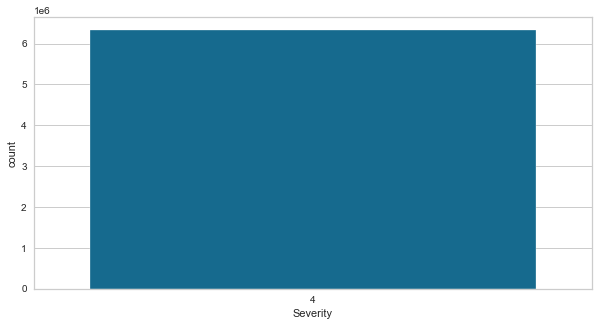

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='Severity')

<AxesSubplot:xlabel='Severity', ylabel='count'>

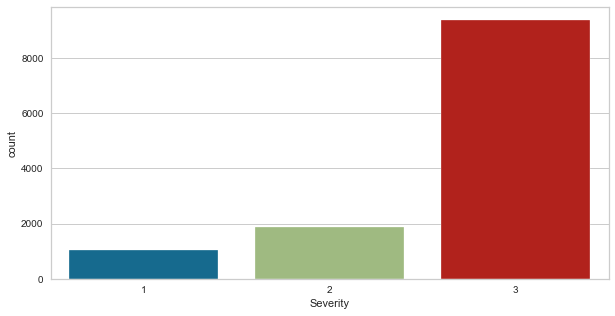

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='Severity')

## 4.2. Material (Target vs not)

<AxesSubplot:xlabel='Material', ylabel='count'>

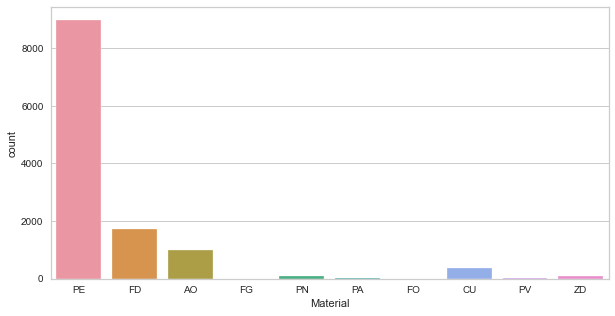

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='Material')

<AxesSubplot:xlabel='Material', ylabel='count'>

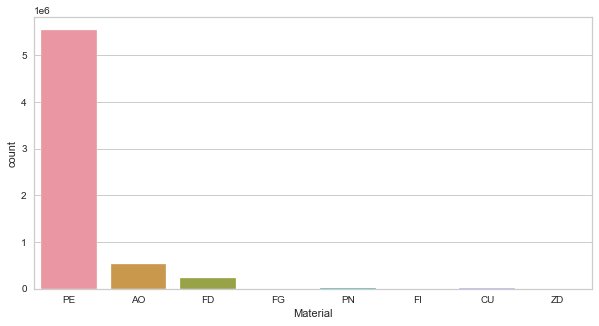

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='Material')

In [ ]:
names_of_material_array = df_incidence['Material'].unique()
names_of_material = names_of_material_array.tolist()

In [ ]:
names_of_material

['PE', 'FD', 'AO', 'FG', 'PN', 'PA', 'FO', 'CU', 'PV', 'ZD']

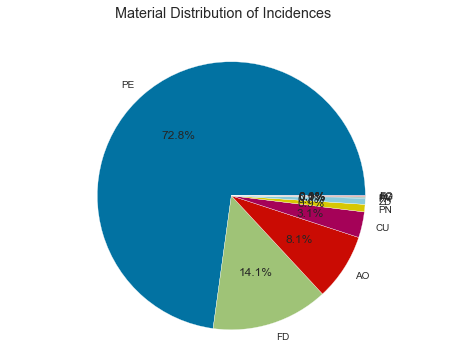

In [ ]:
# Group the data by Fruit and sum the counts
# Calculate the frequency of each Fruit
grouped = df_incidence['Material'].value_counts().reset_index()
grouped.columns = ['Material', 'Frequency']

# Plot the pie chart
plt.pie(grouped['Frequency'], labels=grouped['Material'], autopct='%1.1f%%')
plt.axis('equal')
plt.suptitle("Material Distribution of Incidences")
plt.show()

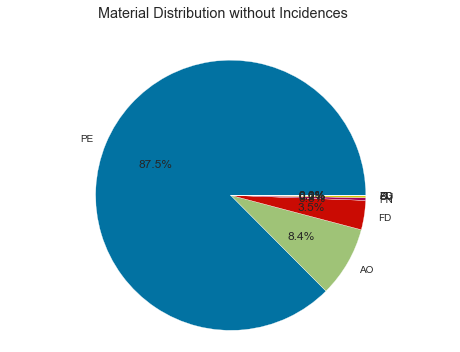

In [ ]:
# Group the data by Fruit and sum the counts
# Calculate the frequency of each Fruit
grouped = df_no_incidence['Material'].value_counts().reset_index()
grouped.columns = ['Material', 'Frequency']

# Plot the pie chart
plt.pie(grouped['Frequency'], labels=grouped['Material'], autopct='%1.1f%%')
plt.axis('equal')
plt.suptitle("Material Distribution without Incidences")
plt.show()

In inspections with incidences more pipes are out of material other than PE 

## 4.3. YearBuilt (Target vs not)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(0, 0, '1901'),
  Text(1, 0, '1950'),
  Text(2, 0, '1951'),
  Text(3, 0, '1954'),
  Text(4, 0, '1956'),
  Text(5, 0, '1963'),
  Text(6, 0, '1964'),
  Text(7, 0, '1965'),
  Text(8, 0, '1966'),
  Text(9, 0, '1967'),
  Text(10, 0, '1968'),
  Text(11, 0, '1969'),
  Text(12, 0, '1970'),
  Text(13, 0, '1971'),
  Text(14, 0, '1972'),
  Text(15, 0, '1973'),
  Text(16, 0, '1974'),
  Text(17, 0, '1975'),
  Text(18, 0, '1976'),
  Text(19, 0, '1977'),
  Text(20, 0, '1978'),
  Text(21, 0, '1979'),
  Text(22, 0, '1980'),
  Text(23, 0, '1981'),
  Text(24, 0, '1982'),
  Text(25, 0, '1983'),
  Text(26, 0, '1984'),
  Text(27, 0, '1985'),
  Text(28, 0, '1986'),
  Text(29, 0, '1987'),
  Text(30, 0, '1988'),
  T

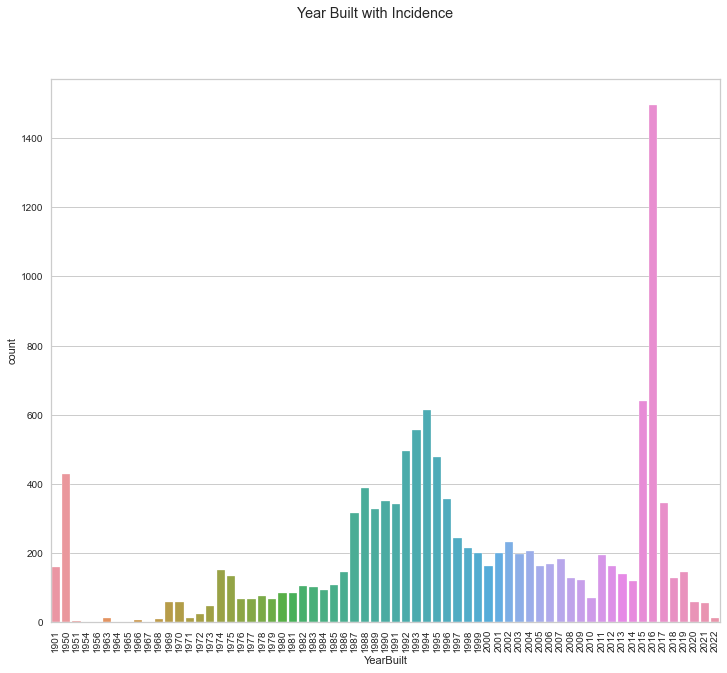

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='YearBuilt')
plt.suptitle("Year Built with Incidence")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),
 [Text(0, 0, '1901'),
  Text(1, 0, '1912'),
  Text(2, 0, '1914'),
  Text(3, 0, '1920'),
  Text(4, 0, '1923'),
  Text(5, 0, '1925'),
  Text(6, 0, '1926'),
  Text(7, 0, '1927'),
  Text(8, 0, '1928'),
  Text(9, 0, '1929'),
  Text(10, 0, '1930'),
  Text(11, 0, '1932'),
  Text(12, 0, '1934'),
  Text(13, 0, '1936'),
  Text(14, 0, '1937'),
  Text(15, 0, '1938'),
  Text(16, 0, '1940'),
  Text(17, 0, '1941'),
  Text(18, 0, '1943'),
  Text(19, 0, '1944'),
  Text(20, 0, '1949'),
  Text(21, 0, '1950'),
  Text(22, 0, '1951'),
  Text(23, 0, '1952'),
  Text(24, 0, '1953'),
  Tex

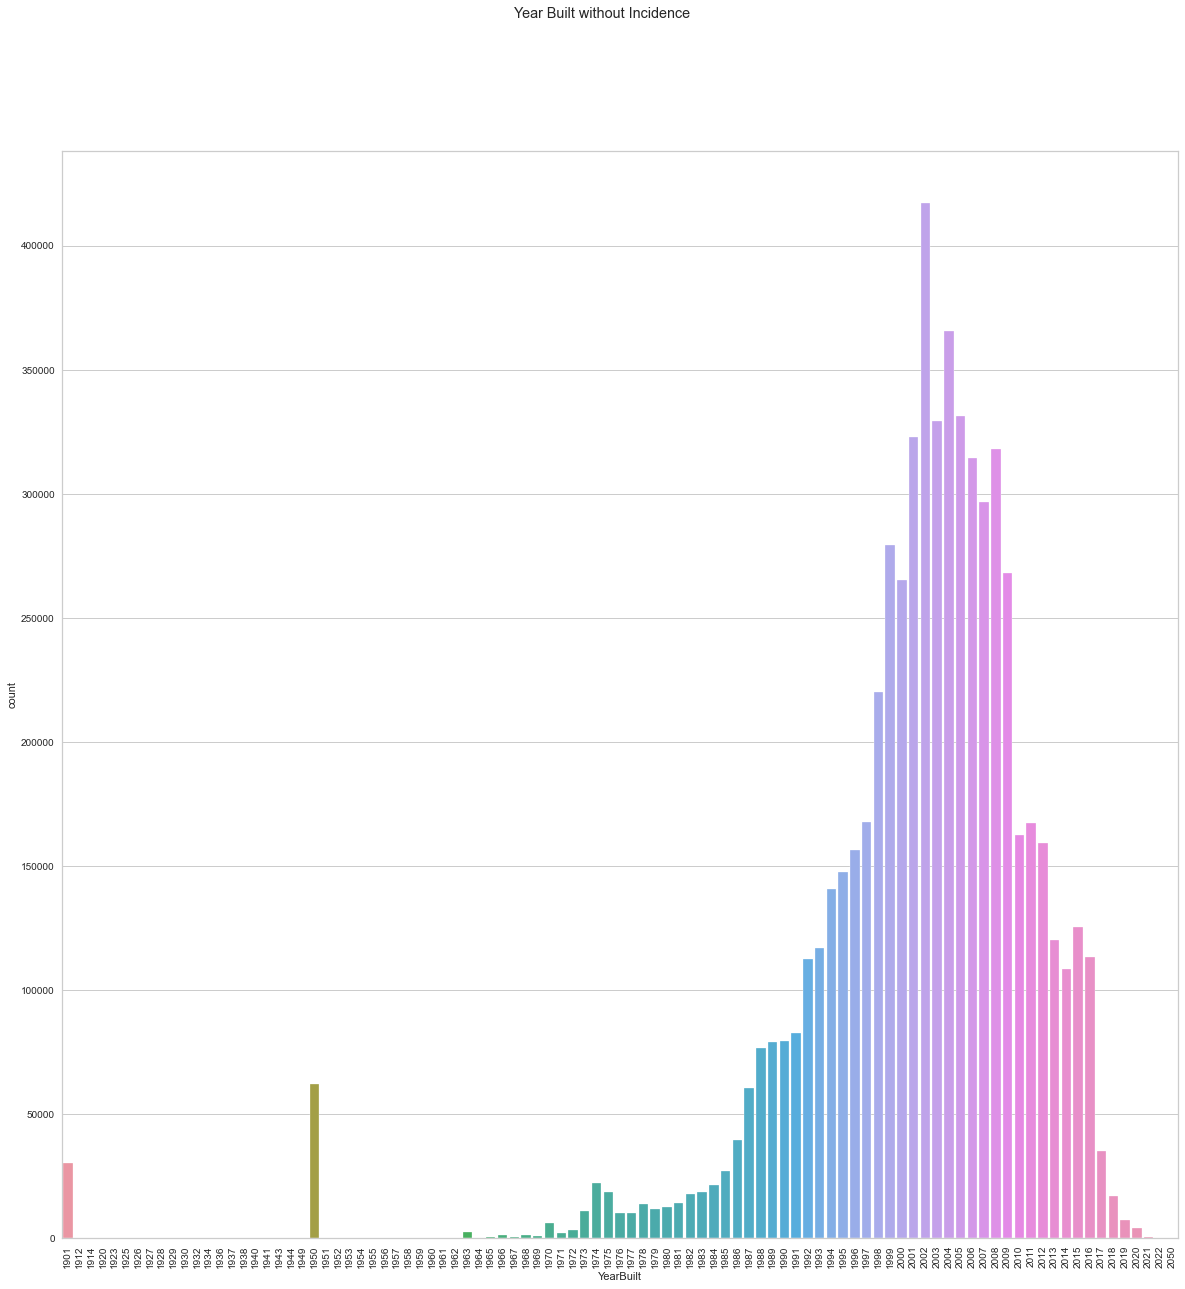

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='YearBuilt')
plt.suptitle("Year Built without Incidence")
plt.xticks(rotation=90)

There is especially a peak in pipes build in 2017

In [ ]:
import scipy.stats as stats

u_statistic, p_value = stats.mannwhitneyu(df_incidence['YearBuilt'], df_no_incidence['YearBuilt'])

print("U-statistic: ", u_statistic)
print("P-value: ", p_value)

if p_value > 0.05:
    print("There is no significant difference between the sample")
else:
    print("There is a significant difference between the samples. Could be a determinant")

U-statistic:  33169165108.0
P-value:  1.117636723012039e-183
There is a significant difference between the samples. Could be a determinant


## 4.4. Gas Type (Target vs not)

<AxesSubplot:xlabel='GasType', ylabel='count'>

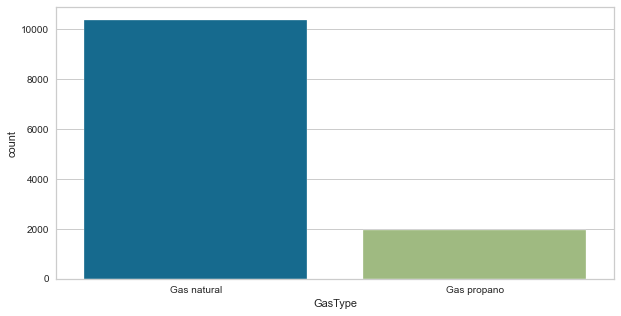

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='GasType')

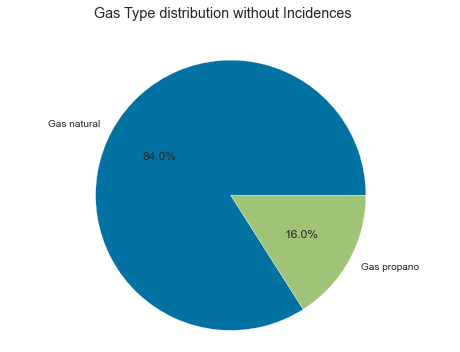

In [ ]:
grouped = df_incidence['GasType'].value_counts().reset_index()
grouped.columns = ['GasType', 'Frequency']

# Plot the pie chart
plt.pie(grouped['Frequency'], labels=grouped['GasType'], autopct='%1.1f%%')
plt.axis('equal')
plt.suptitle("Gas Type distribution without Incidences")
plt.show()

<AxesSubplot:xlabel='GasType', ylabel='count'>

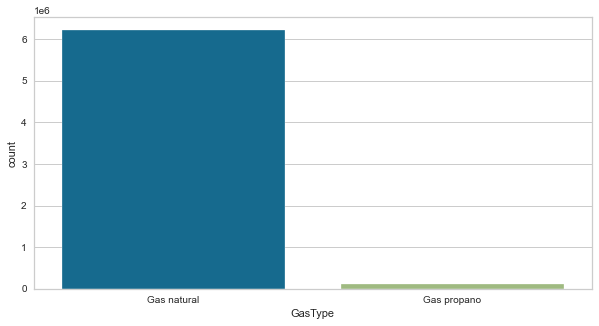

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='GasType')

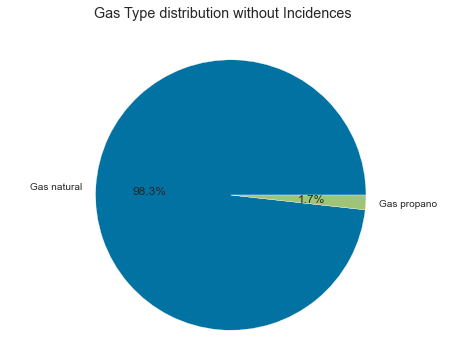

In [ ]:
grouped = df_no_incidence['GasType'].value_counts().reset_index()
grouped.columns = ['GasType', 'Frequency']

# Plot the pie chart
plt.pie(grouped['Frequency'], labels=grouped['GasType'], autopct='%1.1f%%')
plt.axis('equal')
plt.suptitle("Gas Type distribution without Incidences")
plt.show()

It seems that the amount of pipes with gas type 'Natural Gas' is higher than the amount of pipes with gas type 'Other Gas'. This could be a determinant for the incidence.

## 4.5. Inspection Year(Target vs not)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021')])

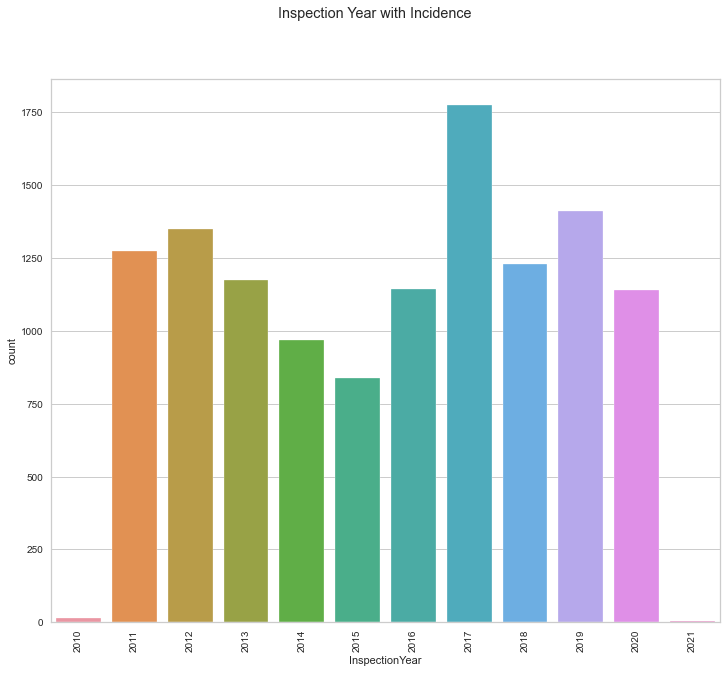

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='InspectionYear')
plt.suptitle("Inspection Year with Incidence")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021')])

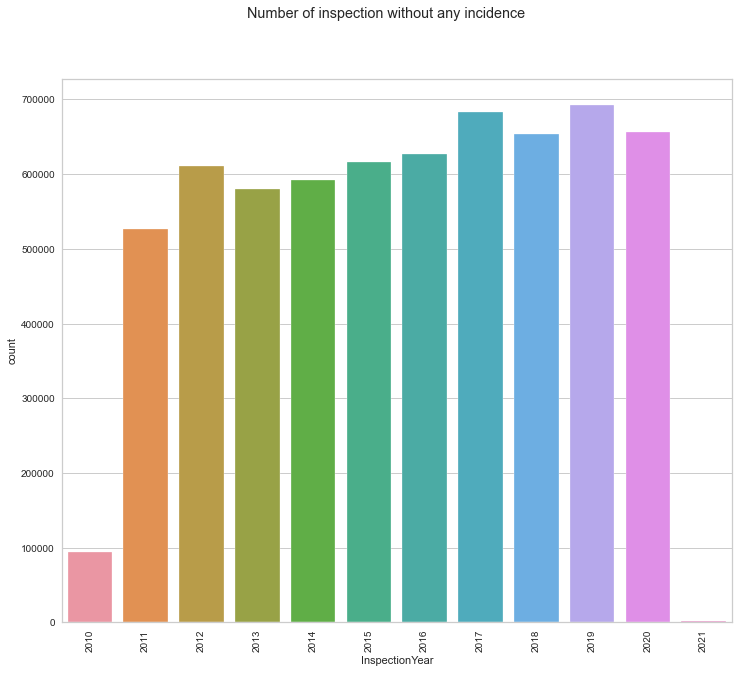

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='InspectionYear')
plt.suptitle("Number of inspection without any incidence")
plt.xticks(rotation=90)

In [ ]:
import scipy.stats as stats

u_statistic, p_value = stats.mannwhitneyu(df_incidence['InspectionYear'], df_no_incidence['InspectionYear'])

print("U-statistic: ", u_statistic)
print("P-value: ", p_value)

if p_value > 0.05:
    print("There is no significant difference between the sample")
else:
    print("There is a significant difference between the samples. Could be a determinant")

U-statistic:  38819309623.5
P-value:  0.2822783237770178
There is no significant difference between the sample


## 4.6. Last review(Target vs not)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '3

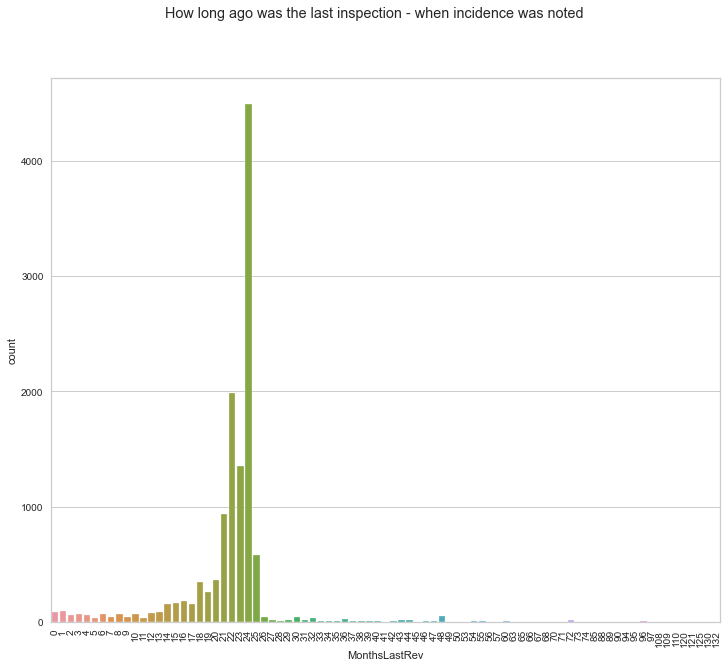

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='MonthsLastRev')
plt.suptitle("How long ago was the last inspection - when incidence was noted")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14

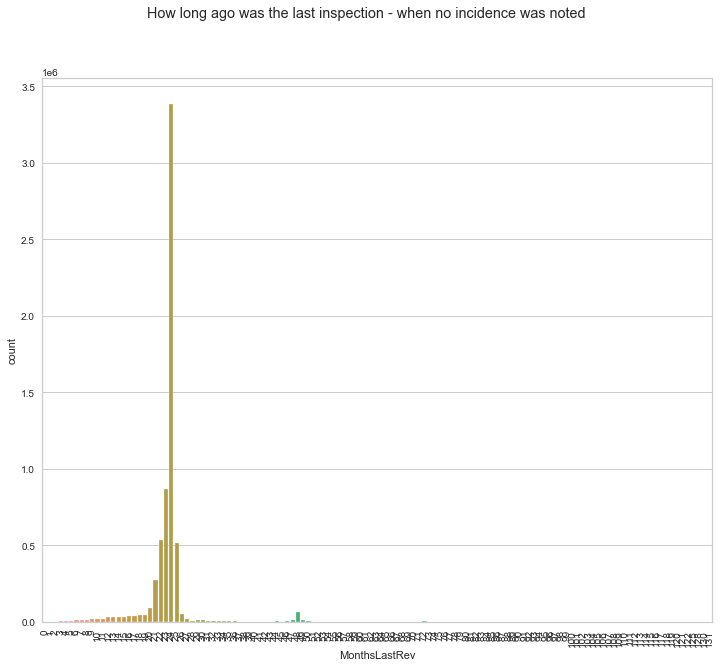

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='MonthsLastRev')
plt.suptitle("How long ago was the last inspection - when no incidence was noted")
plt.xticks(rotation=90)

In [ ]:
import scipy.stats as stats

u_statistic, p_value = stats.mannwhitneyu(df_incidence['MonthsLastRev'], df_no_incidence['MonthsLastRev'])

print("U-statistic: ", u_statistic)
print("P-value: ", p_value)

if p_value > 0.05:
    print("There is no significant difference between the sample")
else:
    print("There is a significant difference between the samples. Could be a determinant")

U-statistic:  29250710141.5
P-value:  0.0
There is a significant difference between the samples. Could be a determinant


## 4.7. Diameter review(Target vs not)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '11.0'),
  Text(1, 0, '12.0'),
  Text(2, 0, '13.0'),
  Text(3, 0, '15.0'),
  Text(4, 0, '16.0'),
  Text(5, 0, '19.0'),
  Text(6, 0, '19.05'),
  Text(7, 0, '20.0'),
  Text(8, 0, '25.0'),
  Text(9, 0, '25.4'),
  Text(10, 0, '31.75'),
  Text(11, 0, '32.0'),
  Text(12, 0, '38.1'),
  Text(13, 0, '39.0'),
  Text(14, 0, '40.0'),
  Text(15, 0, '50.0'),
  Text(16, 0, '50.8'),
  Text(17, 0, '51.0'),
  Text(18, 0, '63.0'),
  Text(19, 0, '63.5'),
  Text(20, 0, '70.0'),
  Text(21, 0, '75.0'),
  Text(22, 0, '76.19999999999999'),
  Text(23, 0, '80.0'),
  Text(24, 0, '90.0'),
  Text(25, 0, '100.0'),
  Text(26, 0, '101.6'),
  Text(27, 0, '110.0'),
  Text(28, 0, '125.0'),
  Text(29, 0, '150.0'),
  Text(30, 0, '152.39999999999998'),
  Text(31, 0, '160.0'),
  Text(32

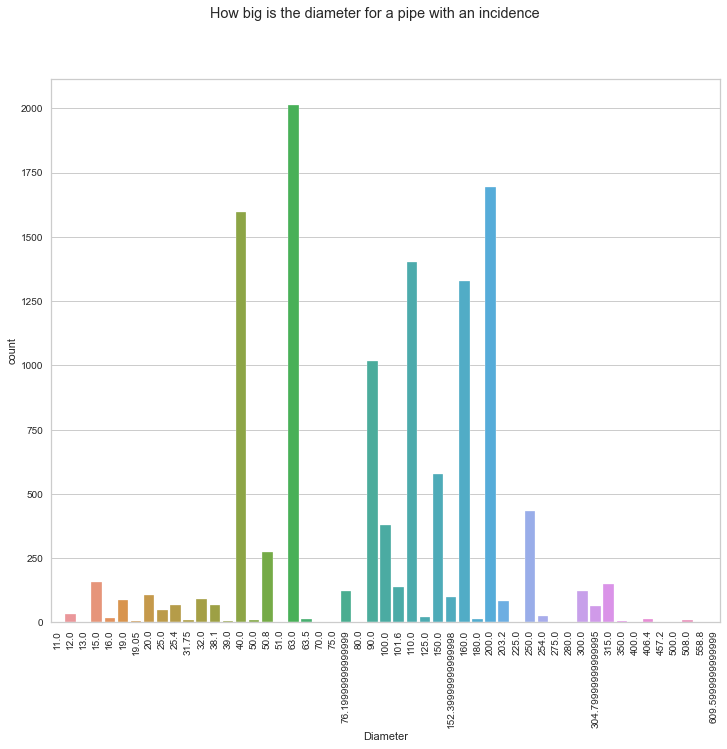

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='Diameter')
plt.suptitle("How big is the diameter for a pipe with an incidence")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, '10.0'),
  Text(1, 0, '11.0'),
  Text(2, 0, '12.0'),
  Text(3, 0, '12.7'),
  Text(4, 0, '13.0'),
  Text(5, 0, '14.0'),
  Text(6, 0, '15.0'),
  Text(7, 0, '16.0'),
  Text(8, 0, '18.0'),
  Text(9, 0, '19.0'),
  Text(10, 0, '19.05'),
  Text(11, 0, '20.0'),
  Text(12, 0, '25.0'),
  Text(13, 0, '25.4'),
  Text(14, 0, '31.75'),
  Text(15, 0, '32.0'),
  Text(16, 0, '38.1'),
  Text(17, 0, '39.0'),
  Text(18, 0, '40.0'),
  Text(19, 0, '48.0'),
  Text(20, 0, '50.0'),
  Text(21, 0, '50.8'),
  Text(22, 0, '51.0'),
  Text(23, 0, '60.0'),
  Text(24, 0, '63.0'),
  Text(25, 0, '63.5'),
  Text(26, 0, '75.0'),
  Text(27, 0, '76.19999999999999'),
  Text(28, 0, '80.0'),
  Text(29, 0, '88.0'),
  Text(30, 0, '90.0'),
  Te

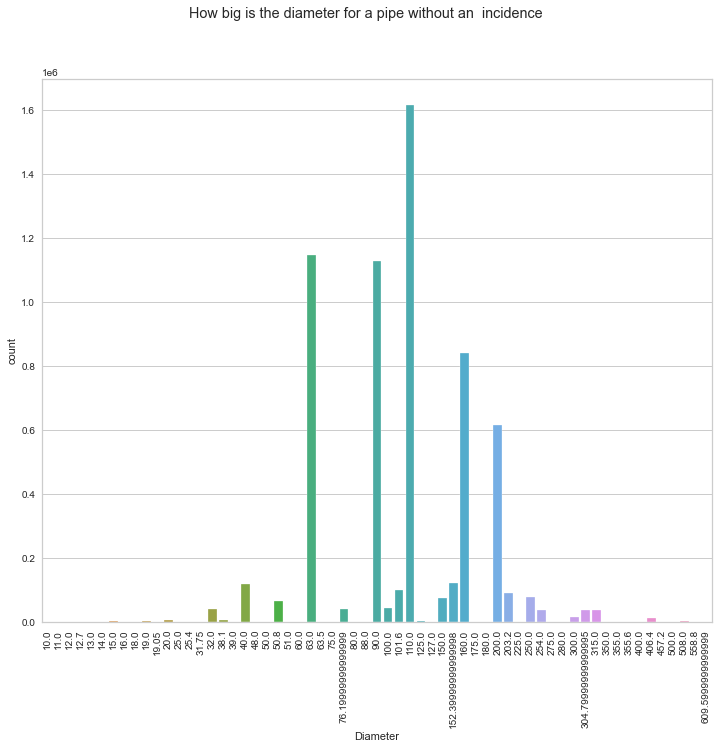

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='Diameter')
plt.suptitle("How big is the diameter for a pipe without an  incidence")
plt.xticks(rotation=90)

In [ ]:
import scipy.stats as stats

u_statistic, p_value = stats.mannwhitneyu(df_incidence['Diameter'], df_no_incidence['Diameter'])

print("U-statistic: ", u_statistic)
print("P-value: ", p_value)

if p_value > 0.05:
    print("There is no significant difference between the sample")
else:
    print("There is a significant difference between the samples. Could be a determinant")

U-statistic:  35573112977.5
P-value:  3.2216777659549565e-67
There is a significant difference between the samples. Could be a determinant


## 4.8 Pressure review(Target vs not)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0.025'),
  Text(1, 0, '0.05'),
  Text(2, 0, '0.1'),
  Text(3, 0, '0.15'),
  Text(4, 0, '0.4'),
  Text(5, 0, '1.7'),
  Text(6, 0, '2.0'),
  Text(7, 0, '4.0'),
  Text(8, 0, '5.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '16.0'),
  Text(12, 0, '36.0'),
  Text(13, 0, '40.0'),
  Text(14, 0, '45.0'),
  Text(15, 0, '49.5'),
  Text(16, 0, '72.0')])

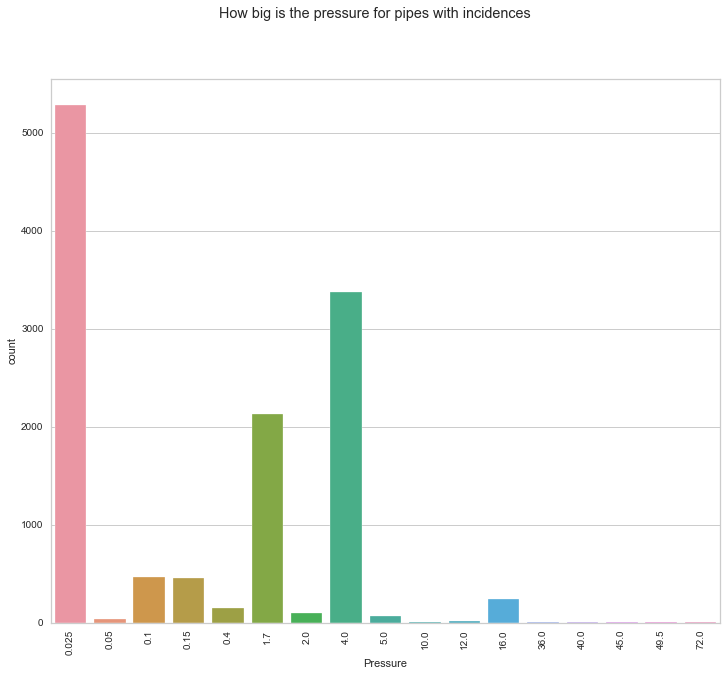

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='Pressure')
plt.suptitle("How big is the pressure for pipes with incidences")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '0.025'),
  Text(1, 0, '0.05'),
  Text(2, 0, '0.1'),
  Text(3, 0, '0.15'),
  Text(4, 0, '0.4'),
  Text(5, 0, '1.7'),
  Text(6, 0, '2.0'),
  Text(7, 0, '4.0'),
  Text(8, 0, '5.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '16.0'),
  Text(12, 0, '25.0'),
  Text(13, 0, '36.0'),
  Text(14, 0, '40.0'),
  Text(15, 0, '45.0'),
  Text(16, 0, '49.5'),
  Text(17, 0, '59.5'),
  Text(18, 0, '72.0'),
  Text(19, 0, '80.0')])

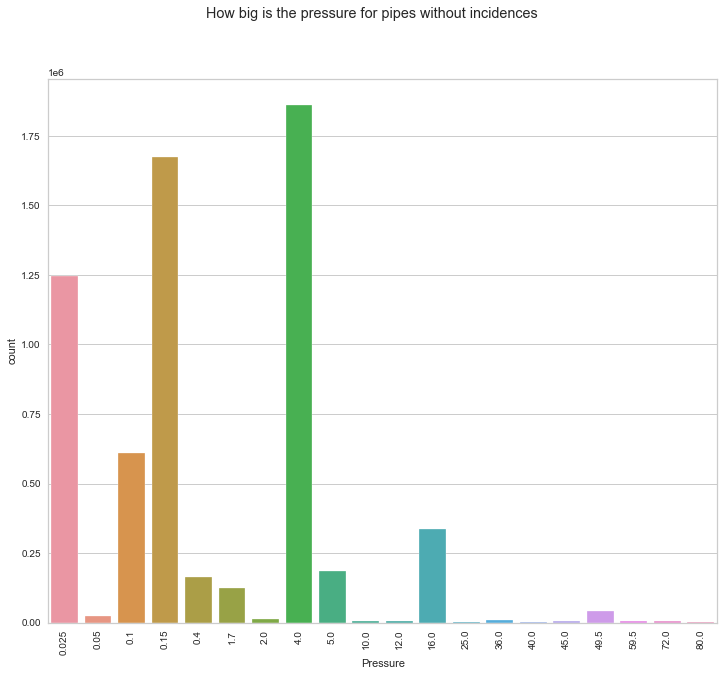

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='Pressure')
plt.suptitle("How big is the pressure for pipes without incidences")
plt.xticks(rotation=90)

In [ ]:
import scipy.stats as stats

u_statistic, p_value = stats.mannwhitneyu(df_incidence['Pressure'], df_no_incidence['Pressure'])

print("U-statistic: ", u_statistic)
print("P-value: ", p_value)

if p_value > 0.05:
    print("There is no significant difference between the sample")
else:
    print("There is a significant difference between the samples. Could be a determinant")

U-statistic:  32481880937.0
P-value:  5.654814269971251e-224
There is a significant difference between the samples. Could be a determinant


## 4.9. Lenght review(Target vs not)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(3

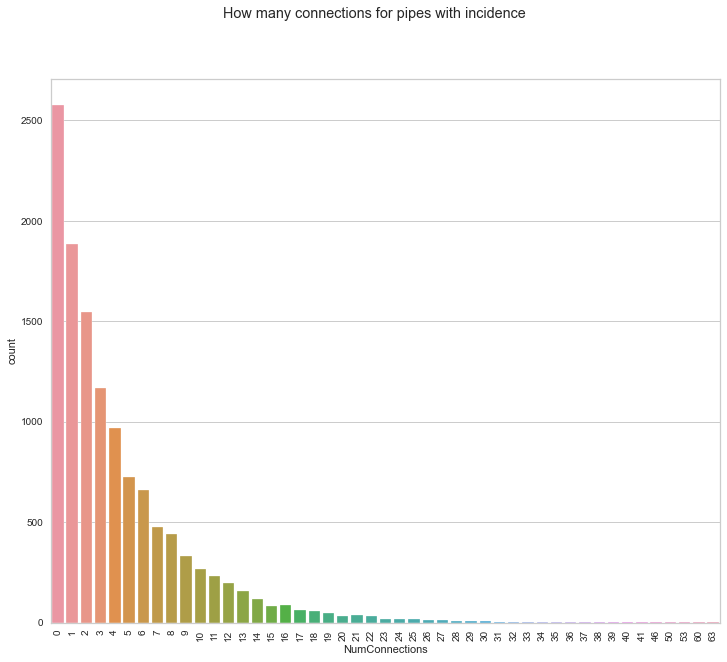

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==1],x='NumConnections')
plt.suptitle("How many connections for pipes with incidence")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '3

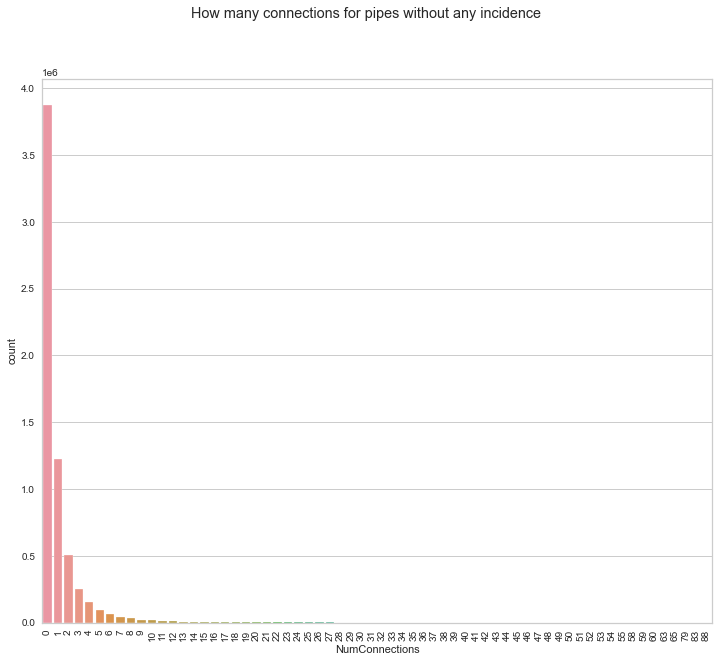

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_combined[df_combined['Incidence']==0],x='NumConnections')
plt.suptitle("How many connections for pipes without any incidence")
plt.xticks(rotation=90)

In [ ]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

In [ ]:
import scipy.stats as stats

u_statistic, p_value = stats.mannwhitneyu(df_incidence['NumConnections'], df_no_incidence['NumConnections'])

print("U-statistic: ", u_statistic)
print("P-value: ", p_value)

if p_value > 0.05:
    print("There is no significant difference between the sample")
else:
    print("There is a significant difference between the samples. Could be a determinant")

U-statistic:  60144893615.5
P-value:  0.0
There is a significant difference between the samples. Could be a determinant
